In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import networkx as nx
import numpy as np
import math
from tabulate import tabulate

In [18]:
#funciones
def fnModa(x):
    return x.mode()[0]

def fnCV(x):
    return x.std()/x.mean()

def fnGaussiana(x_int,X):
    # estimacion de los parametros
    mu = X.mean()
    s1 = X.std()
    # obterner la gaussiana
    A = 1/(math.sqrt(2*math.pi)*s1)
    B = -0.5*((x_int-mu)/s1)**2
    # fg = A*math.exp(B) # vectorial
    fg = [A*math.exp(B[i]) for i in range(0,x_int.shape[0])]
    return fg

def fnExponencial(x_int,X):
    # estimacion de parametros
    lamda = 1/X.mean()
    # obtener la exponencial de 1P
    fe = [lamda*math.exp(-lamda*x_int[i]) for i in range(0,x_int.shape[0])]
    return fe

def fnGumbel(x_int,X):
    # estimacion de los parametros
    mu = X.mode().max()
    beta = 0.78*X.std()
    # obtener la fn gumbel
    z = [(x_int[i]-mu)/beta for i in range(0,x_int.shape[0])] # vector
    fgum = [(1/beta)*math.exp(-(z[i]+math.exp(-z[i]))) for i in range(0,x_int.shape[0])]
    return fgum

def fnRayleigh(x_int, X):
    sig = X.std()
    A = x_int/ (sig**2)
    B = (-x_int**2)/(2*sig**2)
    fr = A * np.exp(B)

    #print("x_int", x_int)
    #print("fr", fr)

    return fr


In [19]:
#leer datos
dataMat = pd.read_csv("student-mat.csv",delimiter=';')
dataPor = pd.read_csv("student-por.csv",delimiter=';')
#seleccionar variables
dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']]
colnames = dfMat.columns.values
#dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']]

In [20]:
#resumen estadistico
dfMatRes = dfMat.agg(["mean",fnModa,"median",st.variance,"std",fnCV,"kurt","skew"])
dfMatRes

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
fnModa,16.000000,4.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,5.000000,0.000000,10.000000,9.000000,10.000000
median,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
variance,1.628285,1.198445,1.184180,0.486513,0.704324,0.553017,0.803997,0.997725,1.239388,0.793420,1.658678,1.932944,64.049541,11.017053,14.148917,20.989616
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
fnCV,0.076427,0.398177,0.431565,0.481668,0.412313,2.225319,0.227330,0.308725,0.358098,0.601441,0.562121,0.391147,1.401873,0.304266,0.351086,0.439881
kurt,-0.001222,-1.090014,-1.198539,2.344190,-0.014432,5.004727,1.139772,-0.301807,-0.770250,4.759492,-0.790845,-1.014078,21.719150,-0.693830,0.627706,0.403421
skew,0.466270,-0.318381,-0.031672,1.607029,0.632142,2.387026,-0.951882,-0.163351,0.116502,2.190762,0.611960,-0.494604,3.671579,0.240613,-0.431645,-0.732672


In [21]:
#Covarianza
mtxCov = dfMat.cov().round(2)
mtxCov

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.63,-0.23,-0.23,0.06,-0.00,0.23,0.06,0.02,0.18,0.15,0.19,-0.11,1.79,-0.27,-0.69,-0.94
Medu,-0.23,1.20,0.74,-0.13,0.06,-0.19,-0.00,0.03,0.08,0.02,-0.07,-0.07,0.88,0.75,0.89,1.09
Fedu,-0.23,0.74,1.18,-0.12,-0.01,-0.20,-0.00,-0.01,0.05,0.00,-0.02,0.02,0.21,0.69,0.67,0.76
traveltime,0.06,-0.13,-0.12,0.49,-0.06,0.05,-0.01,-0.01,0.02,0.09,0.12,0.01,-0.07,-0.22,-0.40,-0.37
studytime,-0.00,0.06,-0.01,-0.06,0.70,-0.11,0.03,-0.12,-0.06,-0.15,-0.27,-0.09,-0.42,0.45,0.43,0.38
failures,0.23,-0.19,-0.20,0.05,-0.11,0.55,-0.03,0.07,0.10,0.09,0.14,0.07,0.38,-0.88,-1.00,-1.23
famrel,0.06,-0.00,-0.00,-0.01,0.03,-0.03,0.80,0.13,0.06,-0.06,-0.13,0.12,-0.32,0.07,-0.06,0.21
freetime,0.02,0.03,-0.01,-0.01,-0.12,0.07,0.13,1.00,0.32,0.19,0.19,0.11,-0.46,0.04,-0.05,0.05
goout,0.18,0.08,0.05,0.02,-0.06,0.10,0.06,0.32,1.24,0.26,0.60,-0.01,0.39,-0.55,-0.68,-0.68
Dalc,0.15,0.02,0.00,0.09,-0.15,0.09,-0.06,0.19,0.26,0.79,0.74,0.10,0.80,-0.28,-0.21,-0.22


<Axes: >

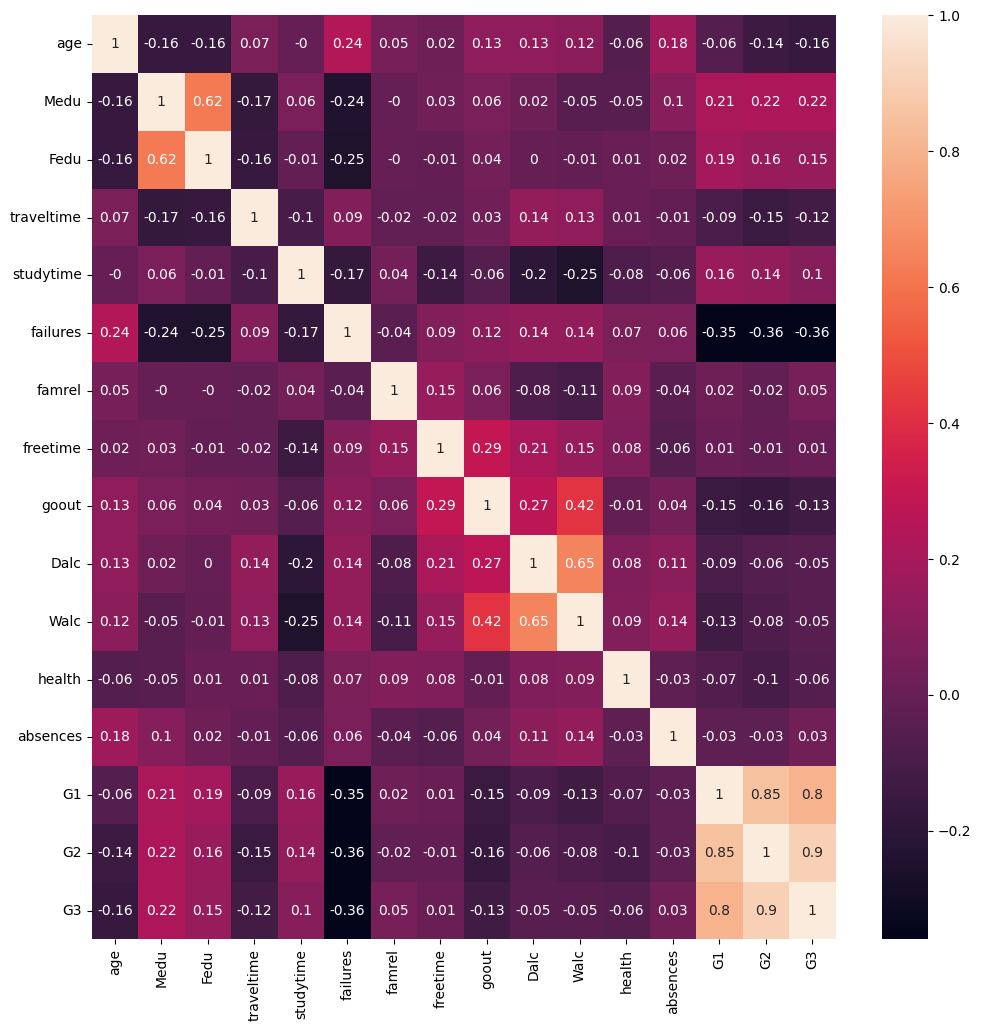

In [22]:
#Correlacion
mtxCorr = dfMat.corr().round(2)
#mtxCorr

#Mostrar grafica correlacion
plt.figure(figsize=(12,12))
sns.heatmap(mtxCorr,annot=True)

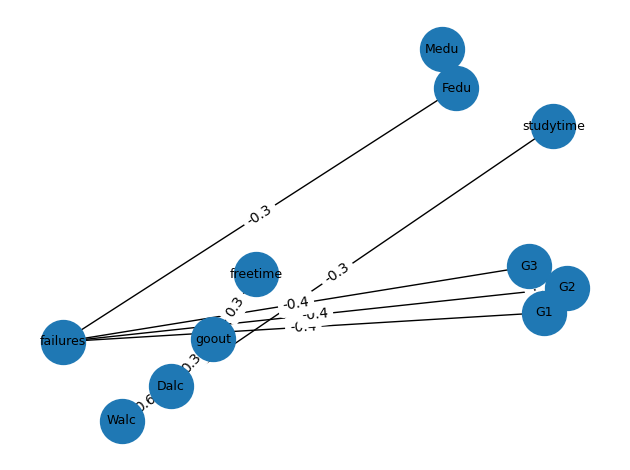

In [23]:
#grafo de correlacion
#Grafo con las dependencias más significativas
datos = dfMat.to_numpy()
mCorr = np.corrcoef(datos, rowvar=False).round(decimals=1)

dependencias = np.abs(mCorr) >= 0.3

grafo = nx.Graph()

for i in range(len(mCorr)):
    for j in range(len(mCorr)):
        if (i != j and dependencias[i, j]):
            grafo.add_edge(colnames[i], colnames[j], weight=mCorr[i,j])

pos = nx.spring_layout(grafo)

#Nodos
nx.draw_networkx_nodes(grafo, pos, node_size=1000)

#Edges
nx.draw_networkx_edges(grafo, pos, edgelist=grafo.edges)

#Node labels
nx.draw_networkx_labels(grafo, pos, font_size=9)

#Edge labels
edgeLabels = nx.get_edge_attributes(grafo,"weight")
nx.draw_networkx_edge_labels(grafo, pos, edgeLabels)


ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

13


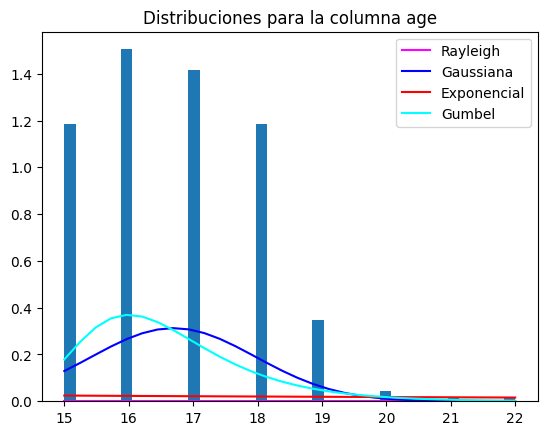

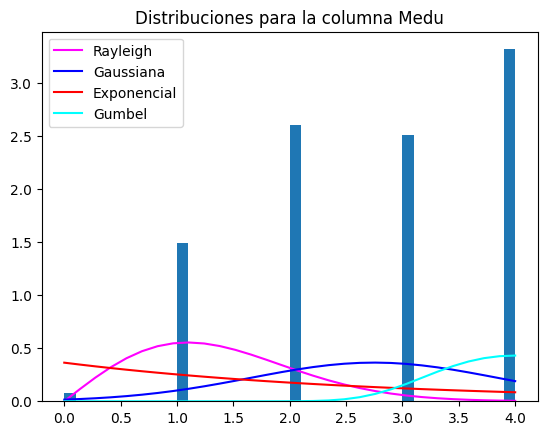

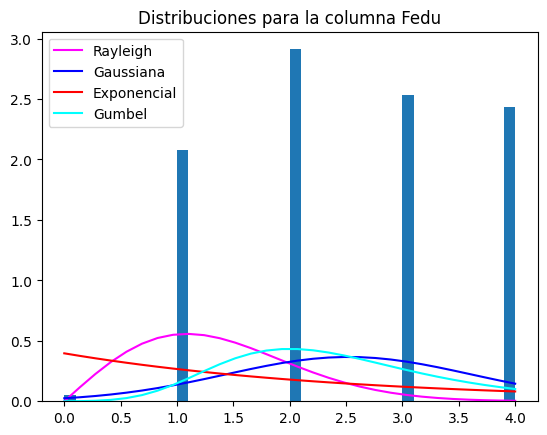

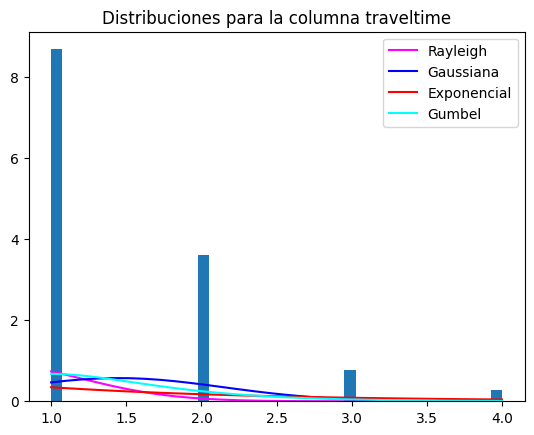

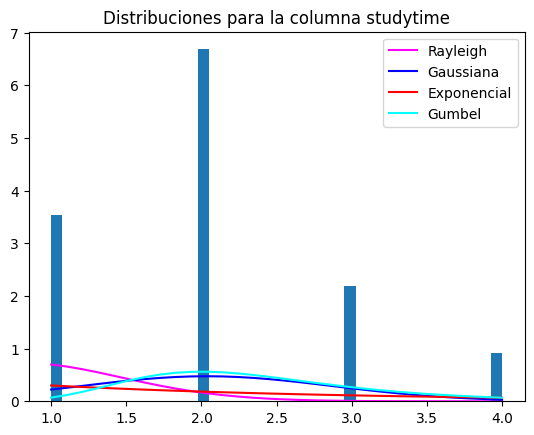

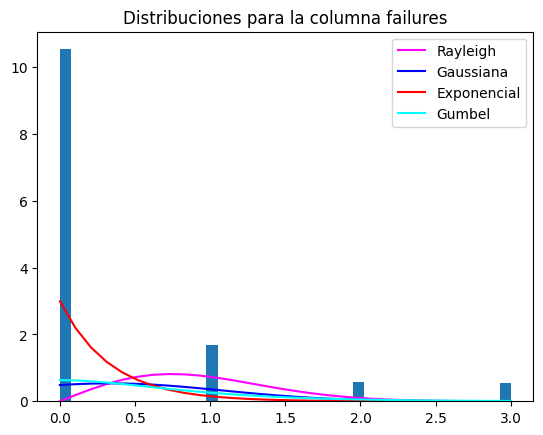

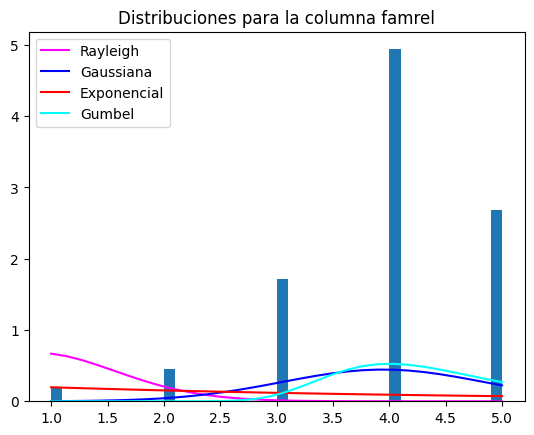

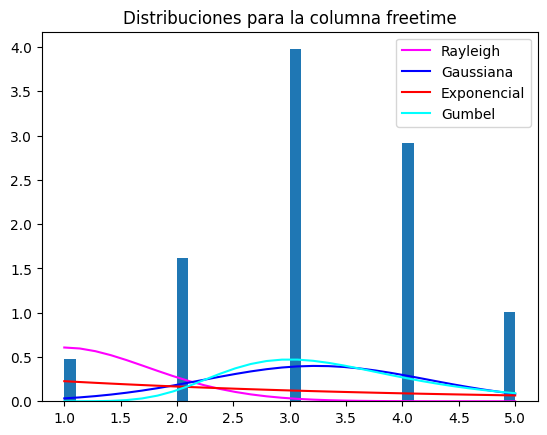

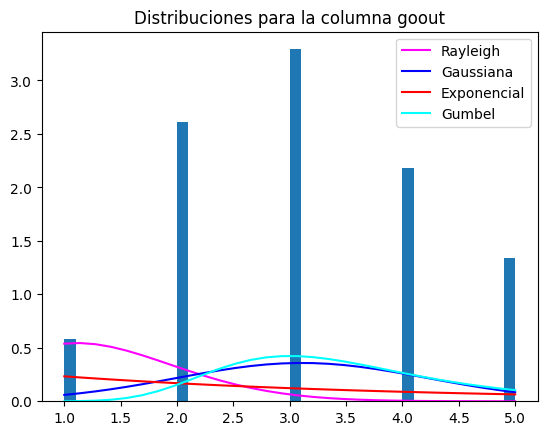

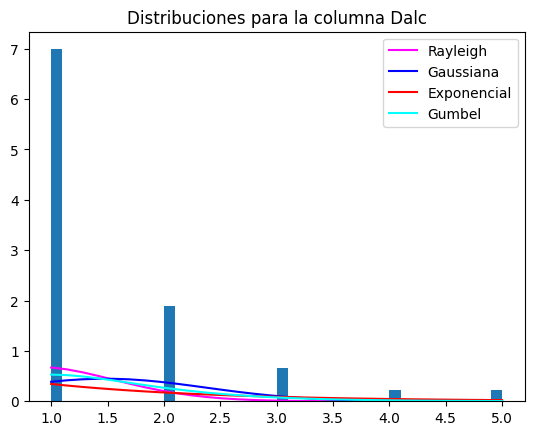

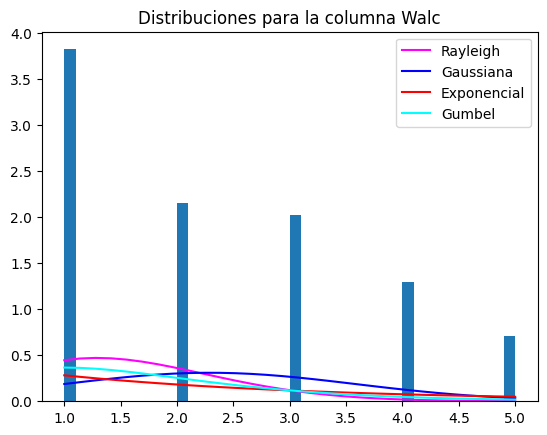

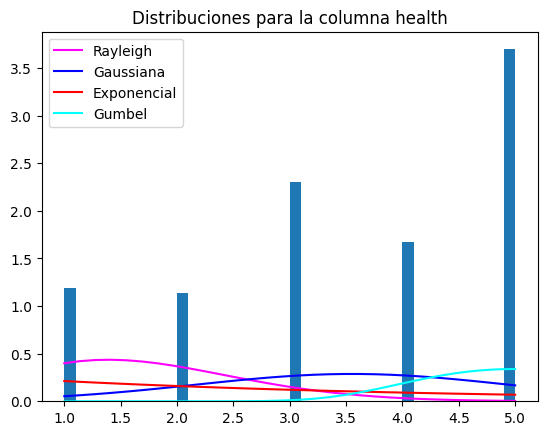

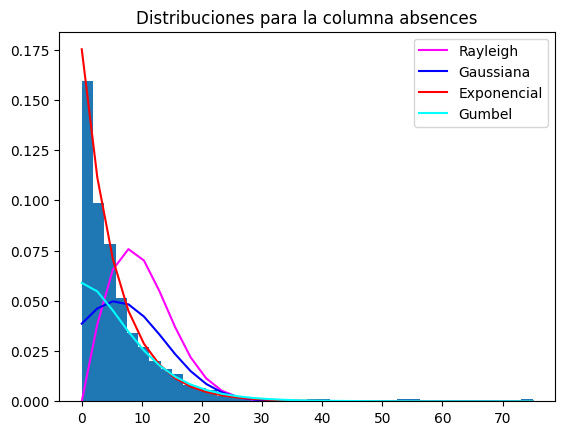

In [24]:
#distribucion de probabilidad 
df = dfMat
X = df.iloc[:,:-3] #Todas menos g1,g2,g3
print(len(X.columns))
#8 columnas, 4 distribuciones

for i in range(len(X.columns)):
    fig, ax = plt.subplots()
    ax.hist(X.iloc[:,i],bins=40, density=True)

    # intervalo de los datos (rango)
    nsize=30
    x_int = np.linspace(X.iloc[:,i].min(),X.iloc[:,i].max(),nsize)

    # distribucion Rayleigh 
    fr = fnRayleigh(x_int,X.iloc[:,i])
    ax.plot(x_int,fr, color="magenta", label="Rayleigh")

    # distribucion normal (doña Gaussiana)
    fg = fnGaussiana(x_int,X.iloc[:,i])
    ax.plot(x_int,fg, color="blue", label="Gaussiana")

    # distribucion exponencial 1P
    fe = fnExponencial(x_int,X.iloc[:,i])
    ax.plot(x_int,fe,color='red', label="Exponencial")

    # distribucion gumbel
    fgumbel = fnGumbel(x_int,X.iloc[:,i])
    ax.plot(x_int,fgumbel,color="cyan", label="Gumbel")

    # Agregar titulo al grafico
    ax.set_title(f"Distribuciones para la columna {X.columns[i]}")

    # Mostrar el grafico
    plt.legend()
    plt.show()

In [25]:
#estimacion de parametros
